In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Import the Dataset

In [3]:
credit_df = pd.read_csv('to_preprocess.csv')
credit_df

,age,income,home_ownership_type,years_of_employment,loan_intent,loan_grade,loan_amnt,loan_int_rate,percent_income_mortgaged,default_history,cb_person_cred_hist_length,loan_status
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28489,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
28490,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
28491,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
28492,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


### Split the data into Stratified Training, Validation and test data

In [4]:
from sklearn.model_selection import train_test_split

X = credit_df.drop('loan_status', axis=1)
y = credit_df['loan_status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [15]:
print(X_train.shape)
print(y_train.shape)
y_train.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

(17096, 11)
(17096,)


loan_status
0    78.29%
1    21.71%
Name: proportion, dtype: object

#### Dealing with Imabalanced Data
From the **Credi Risk EDA** file, the data was found to be imbalanced. To manage this issue, `SMOTE` will be used for **UnderSampling**

#### 1) OverSampling
Oversampling involves oversampling the minority class with replacement. The goal is to generate enough of the minority class to 
have adequate representation during training of the model

#### 2) UnderSampling
This involves taking a smaller sample of the majority class to use for training the model. 

#### 3) Synthetic Minority Oversampling Technique(SMOTE)
This is like oversampling, except with SMOTE, new instances of the minority class are synthesized based on the existing data.


In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

under_sampled_set = pd.concat([X_train_resampled, y_train_resampled], axis=1)
under_sampled_set

,age,income,home_ownership_type,years_of_employment,loan_intent,loan_grade,loan_amnt,loan_int_rate,percent_income_mortgaged,default_history,cb_person_cred_hist_length,loan_status
0,23,75000,RENT,3.0,PERSONAL,B,10000,11.86,0.13,N,2,0
1,23,85000,RENT,2.0,EDUCATION,B,5000,11.58,0.06,N,4,0
2,28,51000,RENT,13.0,VENTURE,D,7500,16.49,0.15,Y,7,0
3,24,24000,OWN,4.0,VENTURE,B,6400,8.88,0.27,N,4,0
4,29,70000,MORTGAGE,12.0,HOMEIMPROVEMENT,A,7000,7.66,0.10,N,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7419,24,33198,RENT,3.0,MEDICAL,C,7000,14.27,0.21,N,3,1
7420,25,26000,RENT,4.0,MEDICAL,C,8000,12.87,0.31,N,4,1
7421,23,30000,MORTGAGE,6.0,HOMEIMPROVEMENT,A,6725,6.99,0.22,N,3,1
7422,22,48000,RENT,6.0,EDUCATION,A,15000,7.51,0.31,N,2,1


In [21]:
under_sampled_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         7424 non-null   int64  
 1   income                      7424 non-null   int64  
 2   home_ownership_type         7424 non-null   object 
 3   years_of_employment         7424 non-null   float64
 4   loan_intent                 7424 non-null   object 
 5   loan_grade                  7424 non-null   object 
 6   loan_amnt                   7424 non-null   int64  
 7   loan_int_rate               7424 non-null   float64
 8   percent_income_mortgaged    7424 non-null   float64
 9   default_history             7424 non-null   object 
 10  cb_person_cred_hist_length  7424 non-null   int64  
 11  loan_status                 7424 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 696.1+ KB


Distribution of the Classes in the subsample dataset
loan_status
0    0.5
1    0.5
Name: count, dtype: float64


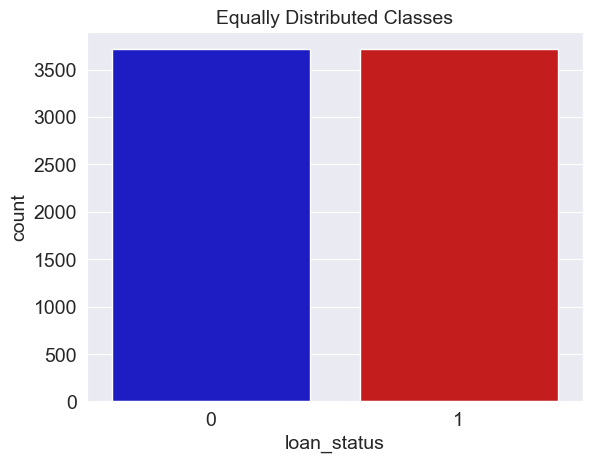

In [20]:
colors = ["#0101DF", "#DF0101"]
print('Distribution of the Classes in the subsample dataset')
print(under_sampled_set['loan_status'].value_counts()/len(under_sampled_set))

sns.countplot(x='loan_status', data=under_sampled_set, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [18]:
under_sampled_set['loan_status'].value_counts()

loan_status
0    3712
1    3712
Name: count, dtype: int64

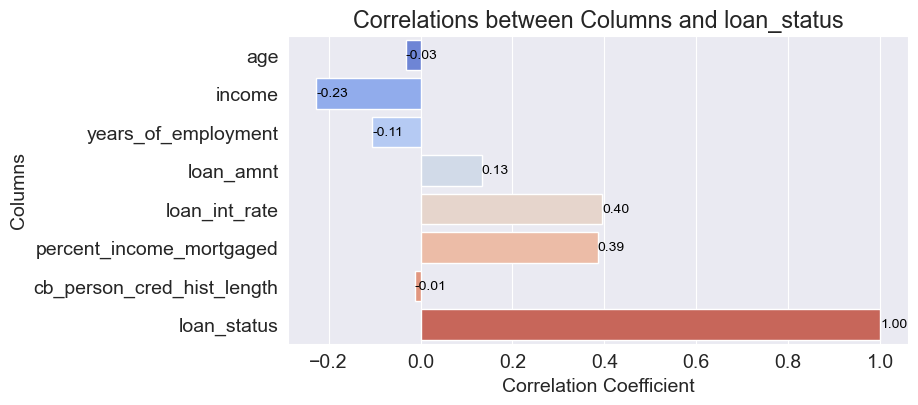

In [17]:
target_column = 'loan_status'  # Replace with your actual target column name

# Calculate correlations between numeric columns and the target variable
numeric_columns = under_sampled_set.select_dtypes(include=['int64', 'float64']).columns
correlations = under_sampled_set[numeric_columns].corrwith(under_sampled_set[target_column])

# Create a horizontal bar chart with labels
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=correlations, y=correlations.index, palette='coolwarm')

# Add values as labels on the bars
for i, value in enumerate(correlations):
    ax.text(value, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title(f'Correlations between Columns and {target_column}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()

Using **SMOTE** for undersampling has increased the correlation strengths of many of the numerical features.

In [8]:
X_smote_train = under_sampled_set.drop('loan_status', axis=1)
y_smote_train = under_sampled_set['loan_status']

X_smote_train.shape
y_smote_train.shape

(7424,)

### Encoding the Categorical columns

In [9]:
cat_cols = X_smote_train.select_dtypes(include=['object']).columns
cat_cols

Index(['home_ownership_type', 'loan_intent', 'loan_grade', 'default_history'], dtype='object')

In [11]:
from sklearn.preprocessing import OneHotEncoder

X_categorical = X_smote_train[cat_cols]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

X_encoded = encoder.fit_transform(X_categorical)
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_cols))

X_train_encoded = pd.concat([X_smote_train, encoded_df], axis=1)

X_train_encoded.drop(cat_cols, axis=1, inplace=True)
X_train_encoded

C:\Users\Motlatsi Moea\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,income,years_of_employment,loan_amnt,loan_int_rate,percent_income_mortgaged,cb_person_cred_hist_length,home_ownership_type_OTHER,home_ownership_type_OWN,home_ownership_type_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_history_Y
0,23,75000,3.0,10000,11.86,0.13,2,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,85000,2.0,5000,11.58,0.06,4,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,51000,13.0,7500,16.49,0.15,7,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,24,24000,4.0,6400,8.88,0.27,4,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,70000,12.0,7000,7.66,0.10,10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,24,33198,3.0,7000,14.27,0.21,3,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7420,25,26000,4.0,8000,12.87,0.31,4,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7421,23,30000,6.0,6725,6.99,0.22,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7422,22,48000,6.0,15000,7.51,0.31,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalising Numerical values

In [12]:
num_cols = X_train_encoded.columns[X_train_encoded.nunique() > 7].tolist()
num_cols.remove('percent_income_mortgaged')
num_cols

['age',
 'income',
 'years_of_employment',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

In [47]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

for column in num_cols:
        scaled_column_name = f'scaled_{column}'
        X_train_encoded[scaled_column_name] = robust_scaler.fit_transform(X_train_encoded[column].values.reshape(-1, 1))

        X_train_encoded.drop(columns=num_cols)
X_train_encoded

,age,income,years_of_employment,loan_amnt,loan_int_rate,percent_income_mortgaged,cb_person_cred_hist_length,home_ownership_type_OTHER,home_ownership_type_OWN,home_ownership_type_RENT,...,loan_grade_E,loan_grade_F,loan_grade_G,default_history_Y,scaled_age,scaled_income,scaled_years_of_employment,scaled_loan_amnt,scaled_loan_int_rate,scaled_cb_person_cred_hist_length
0,23,75000,3.0,10000,11.86,0.13,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.428571,0.646576,-0.2,0.177778,0.000000,-0.4
1,23,85000,2.0,5000,11.58,0.06,4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.428571,0.905248,-0.4,-0.377778,-0.054159,0.0
2,28,51000,13.0,7500,16.49,0.15,7,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.285714,0.025764,1.8,-0.100000,0.895551,0.6
3,24,24000,4.0,6400,8.88,0.27,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.285714,-0.672651,0.0,-0.222222,-0.576402,0.0
4,29,70000,12.0,7000,7.66,0.10,10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.428571,0.517240,1.6,-0.155556,-0.812379,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,24,33198,3.0,7000,14.27,0.21,3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.285714,-0.434724,-0.2,-0.155556,0.466151,-0.2
7420,25,26000,4.0,8000,12.87,0.31,4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.142857,-0.620916,0.0,-0.044444,0.195358,0.0
7421,23,30000,6.0,6725,6.99,0.22,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.428571,-0.517447,0.4,-0.186111,-0.941973,-0.2
7422,22,48000,6.0,15000,7.51,0.31,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.571429,-0.051838,0.4,0.733333,-0.841393,-0.4


In [50]:
from sklearn.preprocessing import RobustScaler

def scale_and_drop_columns(df, columns_to_scale):
    robust_scaler = RobustScaler()

    for column in columns_to_scale:
        scaled_column_name = f'scaled_{column}'
        df[scaled_column_name] = robust_scaler.fit_transform(df[column].values.reshape(-1, 1))

    df.drop(columns=columns_to_scale, inplace=True)

In [54]:
X_train_encoded.columns

Index(['percent_income_mortgaged', 'home_ownership_type_OTHER',
       'home_ownership_type_OWN', 'home_ownership_type_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'default_history_Y', 'scaled_age',
       'scaled_income', 'scaled_years_of_employment', 'scaled_loan_amnt',
       'scaled_loan_int_rate', 'scaled_cb_person_cred_hist_length'],
      dtype='object')

In [56]:
X_train_encoded

,percent_income_mortgaged,home_ownership_type_OTHER,home_ownership_type_OWN,home_ownership_type_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,...,loan_grade_E,loan_grade_F,loan_grade_G,default_history_Y,scaled_age,scaled_income,scaled_years_of_employment,scaled_loan_amnt,scaled_loan_int_rate,scaled_cb_person_cred_hist_length
0,0.13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.428571,0.646576,-0.2,0.177778,0.000000,-0.4
1,0.06,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.428571,0.905248,-0.4,-0.377778,-0.054159,0.0
2,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.285714,0.025764,1.8,-0.100000,0.895551,0.6
3,0.27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-0.285714,-0.672651,0.0,-0.222222,-0.576402,0.0
4,0.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.428571,0.517240,1.6,-0.155556,-0.812379,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,0.21,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.285714,-0.434724,-0.2,-0.155556,0.466151,-0.2
7420,0.31,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.142857,-0.620916,0.0,-0.044444,0.195358,0.0
7421,0.22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.428571,-0.517447,0.4,-0.186111,-0.941973,-0.2
7422,0.31,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.571429,-0.051838,0.4,0.733333,-0.841393,-0.4


### Training Models

In [57]:
X_train_smote = X_train_encoded.values
y_train_smote = y_smote_train.values

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [59]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_smote, y_train_smote)
    training_score = cross_val_score(classifier, X_train_smote, y_train_smote, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 77.0 % accuracy score
Classifiers:  SVC Has a training score of 82.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 80.0 % accuracy score


### Grid Search for hyperparameter tuning

#### 1) Logistic Regression
The hyperparameters that will be tuned here are type of regularization used(**Lasso or Ridge Regression**) as well as the strength of the regularization **C** value.

The solver used will be the default `lbfgs`, however, for undersampled data, `liblinear` will also be used.

#### 2) KNeighbors Classifier
The number of nearest neighbors, `n_neighbors` will be considered varied, as well the `alogrithm` used. 

#### 3) Support Vector Classifier
The hyperparameters that will be tuned are the regularization strength `C` as well as the `kernel` used. Might also use different `degree` values.

#### 4) Decision Tree Classifier
The `Criterion` will be tuned to find the best method to split the data at any given point. The `max_depth` of the tree will also be experimented with. Also the `min_samples_leaf` will be experimented with.


In [71]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear'],
                 'max_iter':[1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_smote, y_train_smote)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_smote, y_train_smote)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': [2, 3, 4]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_smote, y_train_smote)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_smote, y_train_smote)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [72]:
log_reg

LogisticRegression(C=100, max_iter=1000)

#### Creating a Data Pipeline
Before proceeding, this might be a good time to created a pipeline for **data Preprocessing**

In [60]:
X_val

,age,income,home_ownership_type,years_of_employment,loan_intent,loan_grade,loan_amnt,loan_int_rate,percent_income_mortgaged,default_history,cb_person_cred_hist_length
7997,21,37200,RENT,2.0,MEDICAL,A,5100,7.49,0.14,N,4
23649,28,91800,MORTGAGE,4.0,MEDICAL,D,20000,15.28,0.19,N,6
25052,29,62500,MORTGAGE,13.0,MEDICAL,B,5000,11.36,0.08,N,5
155,26,200000,MORTGAGE,4.0,EDUCATION,C,15000,14.79,0.07,N,3
352,22,16800,MORTGAGE,0.0,HOMEIMPROVEMENT,C,4750,13.85,0.28,Y,2
...,...,...,...,...,...,...,...,...,...,...,...
11608,25,66300,MORTGAGE,6.0,MEDICAL,C,20000,15.27,0.26,N,4
21540,32,75000,MORTGAGE,6.0,PERSONAL,B,5000,11.49,0.07,N,8
14281,26,51000,MORTGAGE,2.0,VENTURE,A,12000,6.17,0.24,N,4
18462,31,39000,MORTGAGE,5.0,EDUCATION,B,22000,11.36,0.56,N,5


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Separate categorical and numerical columns
X_categorical = X_val[cat_cols]
X_numerical = X_val[num_cols]

# Define the transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('robust', RobustScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols)
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_val_transformed = pipeline.fit_transform(X_val)
X_val_transformed

C:\Users\Motlatsi Moea\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.        ,  0.        ,  1.        , ..., -0.64874552,
         0.        ,  0.14      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.74731183,
         0.4       ,  0.19      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.04480287,
         0.2       ,  0.08      ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.88530466,
         0.        ,  0.24      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.04480287,
         0.2       ,  0.56      ],
       [ 0.        ,  0.        ,  1.        , ...,  0.6344086 ,
        -0.4       ,  0.18      ]])

In [68]:
y_val.values

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [67]:
# Get the column names after one-hot encoding
encoded_cat_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)

# Combine the column names for the transformed DataFrame
columns = list(encoded_cat_cols) + list(num_cols) + ['target_column']  # Replace 'target_column' with your actual target column name

# Convert the numpy array to a DataFrame
X_train_transformed_df = pd.DataFrame(X_val_transformed, columns=columns)
X_train_transformed_df

,home_ownership_type_OTHER,home_ownership_type_OWN,home_ownership_type_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_F,loan_grade_G,default_history_Y,age,income,years_of_employment,loan_amnt,loan_int_rate,cb_person_cred_hist_length,target_column
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.714286,-0.476863,-0.4,-0.36250,-0.648746,0.0,0.14
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.285714,0.900742,0.0,1.50000,0.747312,0.4,0.19
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.428571,0.161478,1.8,-0.37500,0.044803,0.2,0.08
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,3.630721,0.0,0.87500,0.659498,-0.2,0.07
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.571429,-0.991573,-0.8,-0.40625,0.491039,-0.4,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.142857,0.257355,0.4,1.50000,0.745520,0.0,0.26
5695,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.857143,0.476863,0.4,-0.37500,0.068100,0.8,0.07
5696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,-0.128677,-0.4,0.50000,-0.885305,0.0,0.24
5697,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.714286,-0.431448,0.2,1.75000,0.044803,0.2,0.56


### Evaluate the models using Validation set

In [73]:
from sklearn.metrics import accuracy_score

X_val_transformed
y_val.values

# Logistic Regression
log_reg_pred = log_reg.predict(X_val_transformed)
log_reg_accuracy = accuracy_score(y_val.values, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# K-Nearest Neighbors (KNN)
knears_pred = knears_neighbors.predict(X_val_transformed)
knears_accuracy = accuracy_score(y_val.values, knears_pred)
print(f"K-Nearest Neighbors Accuracy: {knears_accuracy:.4f}")

# Support Vector Classifier (SVC)
svc_pred = svc.predict(X_val_transformed)
svc_accuracy = accuracy_score(y_val.values, svc_pred)
print(f"SVC Accuracy: {svc_accuracy:.4f}")

# Decision Tree Classifier
tree_pred = tree_clf.predict(X_val_transformed)
tree_accuracy = accuracy_score(y_val.values, tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")


Logistic Regression Accuracy: 0.7443
K-Nearest Neighbors Accuracy: 0.6466
SVC Accuracy: 0.6261
Decision Tree Accuracy: 0.5403


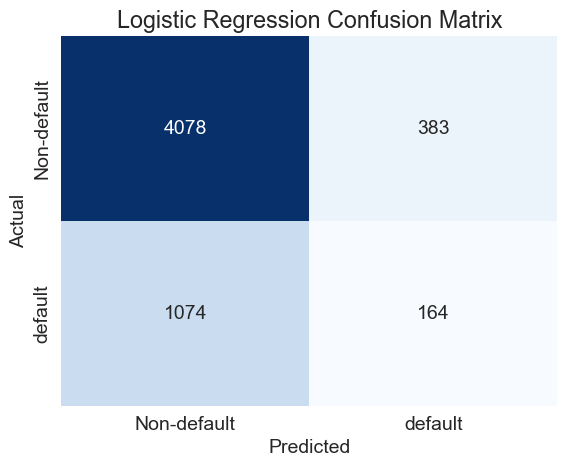

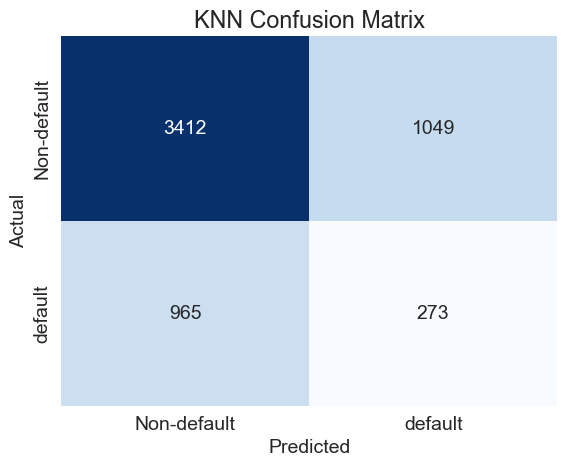

In [76]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
log_reg_conf_matrix = confusion_matrix(y_val.values, log_reg_pred)
sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-default', 'default'], yticklabels=['Non-default', 'default'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Confusion Matrix for KNN
knears_conf_matrix = confusion_matrix(y_val.values, knears_pred)
sns.heatmap(knears_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-default', 'default'], yticklabels=['Non-default', 'default'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### F1, Precision and Recall values

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1 Score for Logistic Regression
log_reg_precision = precision_score(y_val.values, log_reg_pred)* 100
log_reg_recall = recall_score(y_val.values, log_reg_pred)* 100
log_reg_f1 = f1_score(y_val.values, log_reg_pred)* 100

print(f"Logistic Regression Precision: {log_reg_precision:.4f}%")
print(f"Logistic Regression Recall: {log_reg_recall:.4f}%")
print(f"Logistic Regression F1 Score: {log_reg_f1:.4f}%")
print('----' * 44)

# Precision, Recall, and F1 Score for K-Nearest Neighbors (KNN)
knears_precision = precision_score(y_val.values, knears_pred)* 100
knears_recall = recall_score(y_val.values, knears_pred)* 100
knears_f1 = f1_score(y_val.values, knears_pred)* 100

print(f"K-Nearest Neighbors Precision: {knears_precision:.4f}%")
print(f"K-Nearest Neighbors Recall: {knears_recall:.4f}%")
print(f"K-Nearest Neighbors F1 Score: {knears_f1:.4f}%")

Logistic Regression Precision: 29.9817%
Logistic Regression Recall: 13.2472%
Logistic Regression F1 Score: 18.3754%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K-Nearest Neighbors Precision: 20.6505%
K-Nearest Neighbors Recall: 22.0517%
K-Nearest Neighbors F1 Score: 21.3281%


### Using the data without any Sampling technique

The Undersampling using **SMOTE** gave low `Precision`, `Recall` and `F1 Score`. The goal is to see if better initial results would be obtained if no sampling is done and the **imbalanced data** is used as is.

Distribution of the Classes in the original dataset
loan_status
0    0.782867
1    0.217133
Name: count, dtype: float64


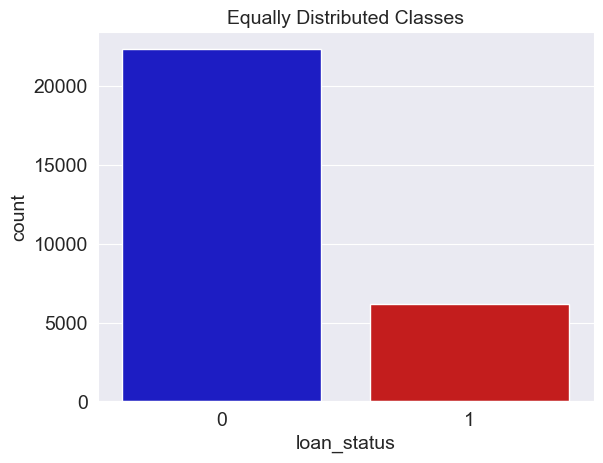

In [6]:
colors = ["#0101DF", "#DF0101"]
print('Distribution of the Classes in the original dataset')
print(credit_df['loan_status'].value_counts()/len(credit_df))

sns.countplot(x='loan_status', data=credit_df, palette=colors)
plt.title('Imbalanced Classes', fontsize=14)
plt.show()

In [16]:
# Separate categorical and numerical columns
X_cat = X_train[cat_cols]
X_num = X_train[num_cols]

# Define the transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('robust', RobustScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols)
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_train_trans = pipeline.fit_transform(X_train)
X_train_trans

C:\Users\Motlatsi Moea\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.        ,  0.        ,  0.        , ..., -0.88888889,
        -0.2       ,  0.07      ],
       [ 0.        ,  0.        ,  1.        , ...,  0.37096774,
        -0.2       ,  0.22      ],
       [ 0.        ,  0.        ,  1.        , ...,  0.39964158,
         0.        ,  0.28      ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.99820789,
        -0.4       ,  0.26      ],
       [ 0.        ,  0.        ,  1.        , ..., -0.66308244,
         2.4       ,  0.12      ],
       [ 0.        ,  0.        ,  1.        , ..., -0.24551971,
         0.6       ,  0.21      ]])

In [17]:
# Get the column names after one-hot encoding
encoded_cat_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)

# Combine the column names for the transformed DataFrame
columns = list(encoded_cat_cols) + list(num_cols) + ['target_column']  # Replace 'target_column' with your actual target column name

# Convert the numpy array to a DataFrame
X_train_trans_df = pd.DataFrame(X_train_trans, columns=columns)
X_train_trans_df

,home_ownership_type_OTHER,home_ownership_type_OWN,home_ownership_type_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_F,loan_grade_G,default_history_Y,age,income,years_of_employment,loan_amnt,loan_int_rate,cb_person_cred_hist_length,target_column
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.571429,-0.328829,0.4,-0.688468,-0.888889,-0.2,0.07
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.285714,-0.792439,-0.6,-0.413081,0.370968,-0.2,0.22
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.714286,-0.475171,-0.2,0.275387,0.399642,0.0,0.28
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.714286,-0.621512,-0.6,-0.819277,-0.378136,0.6,0.07
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.714286,0.988244,-0.6,1.996558,0.066308,0.2,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,-0.428571,-0.235098,-0.4,0.413081,0.129032,-0.2,0.24
17092,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.285714,-0.202000,-0.2,0.275387,-0.179211,0.8,0.21
17093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.571429,-0.416634,0.0,0.275387,-0.998208,-0.4,0.26
17094,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.142857,-0.341024,-0.2,-0.413081,-0.663082,2.4,0.12


In [18]:
y_train.values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Train the models with the imbalaced dataset

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisiticRegression_imb": LogisticRegression(),
    "KNearest_imb": KNeighborsClassifier(),
    "Support Vector Classifier_imb": SVC(),
    "DecisionTreeClassifier_imb": DecisionTreeClassifier()
}

In [20]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_trans_df.values, y_train.values)
    training_score = cross_val_score(classifier, X_train_trans_df.values, y_train.values, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 86.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 87.0 % accuracy score
Classifiers:  SVC Has a training score of 90.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score


### Grid Search for the Imblaced set

In [22]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear'],
                 'max_iter':[1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_trans_df.values, y_train.values)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_trans_df.values, y_train.values)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': [2, 3, 4]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_trans_df.values, y_train.values)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_trans_df.values, y_train.values)

# tree best estimator
tree_clf = grid_tree.best_estimator_

### Evaluating using validation set

In [23]:
from sklearn.metrics import accuracy_score

X_val_transformed
y_val.values

# Logistic Regression
log_reg_pred = log_reg.predict(X_val_transformed)
log_reg_accuracy = accuracy_score(y_val.values, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# K-Nearest Neighbors (KNN)
knears_pred = knears_neighbors.predict(X_val_transformed)
knears_accuracy = accuracy_score(y_val.values, knears_pred)
print(f"K-Nearest Neighbors Accuracy: {knears_accuracy:.4f}")

# Support Vector Classifier (SVC)
svc_pred = svc.predict(X_val_transformed)
svc_accuracy = accuracy_score(y_val.values, svc_pred)
print(f"SVC Accuracy: {svc_accuracy:.4f}")

# Decision Tree Classifier
tree_pred = tree_clf.predict(X_val_transformed)
tree_accuracy = accuracy_score(y_val.values, tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")

Logistic Regression Accuracy: 0.8654
K-Nearest Neighbors Accuracy: 0.8670
SVC Accuracy: 0.9065
Decision Tree Accuracy: 0.8754


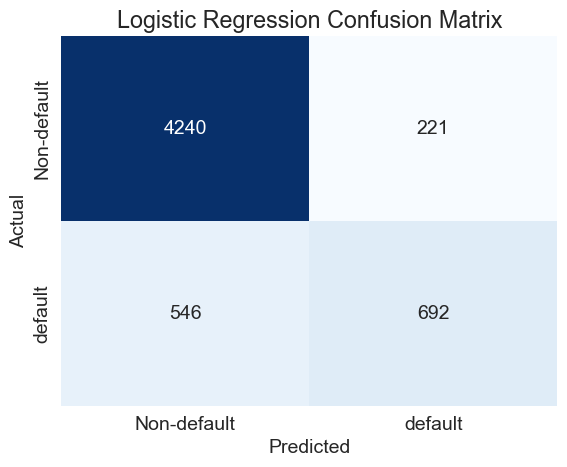

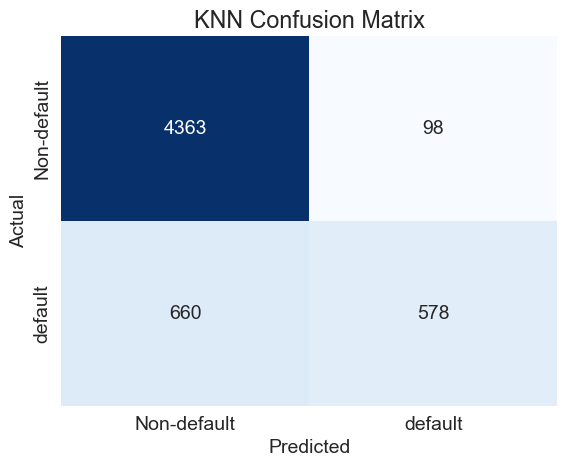

In [24]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
log_reg_conf_matrix = confusion_matrix(y_val.values, log_reg_pred)
sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-default', 'default'], yticklabels=['Non-default', 'default'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Confusion Matrix for KNN
knears_conf_matrix = confusion_matrix(y_val.values, knears_pred)
sns.heatmap(knears_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-default', 'default'], yticklabels=['Non-default', 'default'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1 Score for Logistic Regression
log_reg_precision = precision_score(y_val.values, log_reg_pred)* 100
log_reg_recall = recall_score(y_val.values, log_reg_pred)* 100
log_reg_f1 = f1_score(y_val.values, log_reg_pred)* 100

print(f"Logistic Regression Precision: {log_reg_precision:.4f}%")
print(f"Logistic Regression Recall: {log_reg_recall:.4f}%")
print(f"Logistic Regression F1 Score: {log_reg_f1:.4f}%")
print('----' * 44)

# Precision, Recall, and F1 Score for K-Nearest Neighbors (KNN)
knears_precision = precision_score(y_val.values, knears_pred)* 100
knears_recall = recall_score(y_val.values, knears_pred)* 100
knears_f1 = f1_score(y_val.values, knears_pred)* 100

print(f"K-Nearest Neighbors Precision: {knears_precision:.4f}%")
print(f"K-Nearest Neighbors Recall: {knears_recall:.4f}%")
print(f"K-Nearest Neighbors F1 Score: {knears_f1:.4f}%")

Logistic Regression Precision: 75.7941%
Logistic Regression Recall: 55.8966%
Logistic Regression F1 Score: 64.3422%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
K-Nearest Neighbors Precision: 85.5030%
K-Nearest Neighbors Recall: 46.6882%
K-Nearest Neighbors F1 Score: 60.3971%
